## Time Domain Simulation of a Typical Section

In this example, we simulate the response of two degree of freedom typical section model.
We use the same parameters as in the previous example

![](../assets/section-drawing.svg)

In [1]:
using Aeroelasticity, DifferentialEquations, LinearAlgebra

# define non-dimensional parameters
V = range(1e-6, 3.1, length=1000) # = U/(b*ωθ) (reduced velocity)
a = -1/5 # reference point normalized location
e = -1/10 # center of mass normalized location
μ = 20 # = m/(ρ*pi*b^2) (mass ratio)
r2 = 6/25 # = Iθ/(m*b^2) (radius of gyration about P)
σ = 2/5 # = ωh/ωθ (natural frequency ratio)
xθ = e - a # distance from center of mass to reference point
a0 = 2*pi # lift curve slope
α0 = 0 # zero lift angle
cd0 = 0 # drag coefficient
cm0 = 0 # moment coefficient

# choose dimensional parameters
b = 1 # semichord
ρ = 1 # air density
ωθ = 1 # pitch natural frequency
c = 343 # air speed of sound

# calculate dimensionalized parameters
U = V*b*ωθ # freestrean velocity
m = μ*ρ*pi*b^2 # mass
Sθ = m*xθ*b # mass imbalance
Iθ = r2*m*b^2 # inertia
ωh = σ*ωθ # plunge natural frequency
kh = m*ωh^2 # plunge spring constant
kθ = Iθ*ωθ^2 # pitch spring constant

# reduced velocity
V = 1.0 # = U/(b*ωθ)

# dimensionalized velocity
U = V*b*ωθ

# define submodels
submodels = (Peters{6}(), Section())

# define parameter vector
p = [a, b, a0, α0, cd0, cm0, kh, kθ, m, Sθ, Iθ, U, ρ, c]

# define coupled model
model = CoupledModel(submodels, p)

# construct function
f = ODEFunction(model, p)

# initial states
λ = zeros(6)
h = 0.5
theta = 0
hdot = 0
thetadot = 0
x0 = vcat(λ, h, theta, hdot, thetadot)

# simulate for 100 seconds
tspan = (0.0, 100.0)

# construct problem
prob = ODEProblem(f, x0, tspan, p)

# solve problem
sol = solve(prob, Rodas4())

nothing #hide

We can then plot the solution using DifferentialEquations' built-in interface with the
[Plots](https://github.com/JuliaPlots/Plots.jl) package.

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


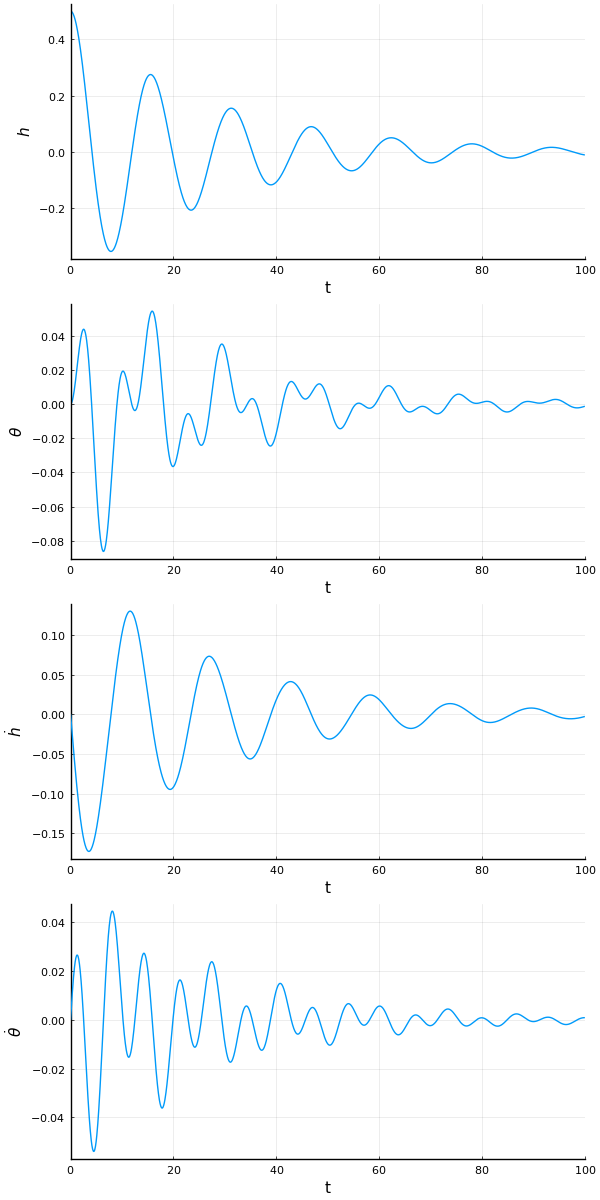

In [2]:
using Plots
pyplot()

plot(sol,
    vars = [7,8,9,10],
    xlabel = "t",
    ylabel = permutedims([
        "\$h\$",
        "\$\\theta\$",
        "\$\\dot{h}\$",
        "\$\\dot{\\theta}\$",
        ]),
    label = "",
    layout = (4, 1),
    size = (600,1200)
    )

For aeroelastic models based on a typical section, we can also visualize the section's
behavior.

[ Info: Saved animation to /tmp/jl_utAla1eZsh.gif


Plots.AnimatedGif("/tmp/jl_utAla1eZsh.gif")
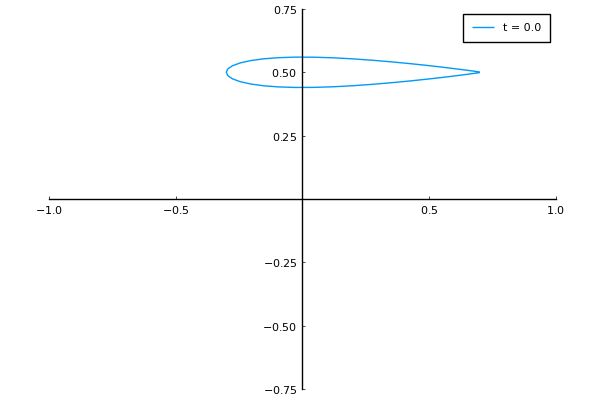

In [3]:
# animation parameters
a = -1/5
b = 0.5

# create animation
@gif for t in range(tspan[1], tspan[2], length=200)
    h, θ = sol(t, idxs=7:8)
    xplot, yplot = section_coordinates(h, θ; a, b)
    plot(xplot, yplot;
        framestyle = :origin,
        grid = :false,
        xlims = (-1.0, 1.0),
        ylims = (-0.75, 0.75),
        aspect_ratio = 1.0,
        label = "t = $(round(t, digits=1))")
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*